In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math

In [30]:
def activation(u):
    if u > 0: 
        return 1 
    else:
        return -1

In [31]:
def obter_u(X, w, b):
    u = 0

    for i in range(len(w)):
        u = u + X[i] * w[i]
    
    return u + b

In [32]:
def calcular_MSE(w, b, X, d):
    mse = 0

    for i in range(len(w)):
        y = math.tanh(obter_u(X[i], w, b))
        mse = mse + pow((d[i] - y), 2)

    return mse / len(X)

In [33]:
def perceptron(max_it, E, alpha, X, d):
    w = [rand.random() for i in range(2)]
    b = rand.random()
    t = 1
    countErros = 0
    while t < max_it and E > 0:
        e = []

        for i in range(len(X)):
            y = activation(obter_u(X[i], w, b))
            e.append(d[i] - y)
            
            for index in range(len(w)):
                w[index] = w[index] + alpha * e[i] * X[i][index]
            
            b = b + alpha * e[i]
            
            if e[i] != 0:
                countErros = countErros + 1

        E = countErros
        t = t + 1

    return (w, b)

In [34]:
def adaline(max_it, Epsilon, alpha, X, d):
    w = [rand.random() for i in range(2)]
    b = rand.random()
    t = 1

    while True:
        firstMSE = calcular_MSE(w, b, X, d)

        for i in range(len(X)):
            y = math.tanh(obter_u(X[i], w, b))
            e = d[i] - y

            for index in range(len(w)):
                w[index] = w[index] + alpha * e * X[i][index]

            b = b + alpha * e

        second_MSE = calcular_MSE(w, b, X, d)
        t = t + 1

        if t > max_it and abs(second_MSE - firstMSE) < Epsilon:
            break

    return (w, b)

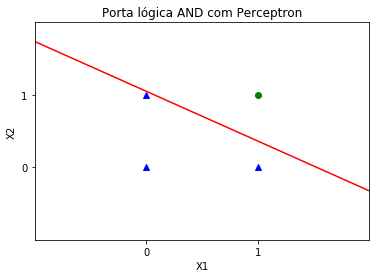

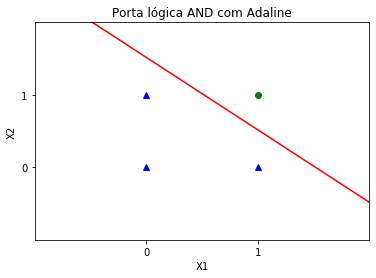

In [35]:
def plotar(w1,w2,bias,title):
    xvals = np.arange(-1, 3, 0.01)     
    newyvals = (((xvals * w2) * - 1) - bias) / w1
    plt.plot(xvals, newyvals, 'r-')    
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis([-1,2,-1,2])
    plt.plot([0,1,0],[0,0,1], 'b^')
    plt.plot([1],[1], 'go')
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.show()
    
def main():
    # Dados de entrada para lógica AND
    X = [[1,1],[1,0],[0,1],[0,0]]
    # Saídas esperadas
    d = [1,-1,-1,-1]                 
    
    # Implemente a função Percepton que deve retornar o vetor de pesos e o bias, respectivamente.
    w, bias = perceptron(max_it=100, E=1, alpha=.1, X=X, d=d)
    plotar(w[0],w[1],bias,"Porta lógica AND com Perceptron")

    # Implemente a função Adaline que deve retornar o vetor de pesos e o bias, respectivamente.
    w, bias = adaline(max_it=100, Epsilon=.0000001, alpha=.1, X=X, d=d)
    plotar(w[0],w[1],bias,"Porta lógica AND com Adaline")
    
if __name__ == '__main__':
    main()

